In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
import fnmatch
import matplotlib.pyplot as plt
import time

def find(pattern, path):
    """
    glob for subdirectories
    INPUTS:
        pattern -- str (with * for missing sectiosn of characters) like glob function
        path -- dict to search, including subdirectories
    OUTPUTS:
        result -- list of files
    """
    result = [] # initialize the list as empty
    for root, dirs, files in os.walk(path): # walk though the path directory, and files
        for name in files:  # walk to the file in the directory
            if fnmatch.fnmatch(name,pattern):  # if the file matches the filetype append to list
                result.append(os.path.join(root,name))
    return result # return full list of file of a given type

def check_path(basepath, path):
    """
    check if path exists, if not then create directory
    """
    if path in basepath:
        return basepath
    elif not os.path.exists(os.path.join(basepath, path)):
        os.makedirs(os.path.join(basepath, path))
        print('Added Directory:'+ os.path.join(basepath, path))
        return os.path.join(basepath, path)
    else:
        return os.path.join(basepath, path)


In [2]:
base_path = './'

In [3]:
filelist = find('*filtered.h5',base_path)

In [5]:
filelist

['./data/0429_1_0.16_10DLC_resnet50_OctoGratingsApr23shuffle1_515000_filtered.h5',
 './data/0429_1_0.16_45DLC_resnet50_OctoGratingsApr23shuffle1_515000_filtered.h5']

In [7]:
base_path = './data/'
csv_filenames = glob(base_path + '*.MOV.csv')
csv_filenames

boris_data = pd.read_csv(csv_filenames[0], header=15)
boris_data

Time                                    Media file path  Total length  \
0    2.902  C:/Users/Angie Michaiel/Documents/deeplabcut_p...         150.4   
1   36.150  C:/Users/Angie Michaiel/Documents/deeplabcut_p...         150.4   
2   36.151  C:/Users/Angie Michaiel/Documents/deeplabcut_p...         150.4   
3   65.609  C:/Users/Angie Michaiel/Documents/deeplabcut_p...         150.4   
4   65.610  C:/Users/Angie Michaiel/Documents/deeplabcut_p...         150.4   
5   95.434  C:/Users/Angie Michaiel/Documents/deeplabcut_p...         150.4   
6   95.435  C:/Users/Angie Michaiel/Documents/deeplabcut_p...         150.4   
7  128.376  C:/Users/Angie Michaiel/Documents/deeplabcut_p...         150.4   

     FPS  Subject  Behavior  Behavioral category  Comment Status  
0  29.97      NaN         1                  NaN      NaN  START  
1  29.97      NaN         1                  NaN      NaN   STOP  
2  29.97      NaN         2                  NaN      NaN  START  
3  29.97      NaN         2                  NaN      NaN   STOP  
4  29.97      NaN         1                  NaN      NaN  START  
5  29.97      NaN         1                  NaN      NaN   STOP  
6  29.97      NaN         2                  NaN      NaN  START  
7  29.97      NaN         2                  NaN      NaN   STOP

In [8]:
boris_data['Time']

0      2.902
1     36.150
2     36.151
3     65.609
4     65.610
5     95.434
6     95.435
7    128.376
Name: Time, dtype: float64

In [10]:
cw = boris_data.loc[boris_data['Behavior'] == '1']

In [11]:
# Loading in DLC File
n = -4
pts = pd.read_hdf(filelist[0])
pts.columns = [' '.join(col[:][1:3]).strip() for col in pts.columns.values]
pts = pts.rename(columns={pts.columns[n]: pts.columns[n].replace(' ', '_') for n in range(len(pts.columns))})
pt_loc_names = pts.columns.values

In [12]:
thresh=.95
likeli_loop_count = 0
df = pd.DataFrame()
for pt_num in range(0, len(pts.keys())):
    current_pt_loc = pts.keys()[pt_num]
    if 'likelihood' in current_pt_loc:
        # find the associated x and y points of the selected likelihood
        # assumes order is x, y, likelihood, will cause problems if isn't true of data...
        assoc_x_pos = pts.keys()[pt_num - 2]
        assoc_x_pt = pts[assoc_x_pos]
        assoc_y_pos = pts.keys()[pt_num - 1]
        assoc_y_pt = pts[assoc_y_pos]

        # select only the likelihood data for this point
        likeli_pt = pts[current_pt_loc]

        # set x/y coords to NaN where the likelihood is below threshold value
        assoc_x_pt[likeli_pt < thresh] = np.nan
        assoc_y_pt[likeli_pt < thresh] = np.nan
        df[assoc_x_pos] = assoc_x_pt
        df[assoc_y_pos] = assoc_y_pt
        df[current_pt_loc] = likeli_pt


In [27]:
df

front_left_x  front_left_y  front_left_likelihood  back_left_x  \
159            NaN           NaN               0.891500          NaN   
237            NaN           NaN               0.918672          NaN   
240            NaN           NaN               0.032110          NaN   
241            NaN           NaN               0.002990          NaN   
242            NaN           NaN               0.008264          NaN   
...            ...           ...                    ...          ...   
1518           NaN           NaN               0.612426  1012.014465   
1519           NaN           NaN               0.874377  1013.884033   
1524           NaN           NaN               0.118267          NaN   
1525           NaN           NaN               0.847598          NaN   
2272           NaN           NaN               0.939714   878.799805   

      back_left_y  back_left_likelihood  pupil_left_x  pupil_left_y  \
159           NaN              0.167146           NaN           NaN   
237           NaN              0.939977           NaN           NaN   
240           NaN              0.487915           NaN           NaN   
241           NaN              0.001589           NaN           NaN   
242           NaN              0.264732           NaN           NaN   
...           ...                   ...           ...           ...   
1518   590.510254              0.999466   1071.005737    587.792297   
1519   590.120605              0.999284   1075.002441    584.215454   
1524          NaN              0.078972           NaN           NaN   
1525          NaN              0.301178           NaN           NaN   
2272   882.885803              0.999893    934.569458    912.762207   

      pupil_left_likelihood  front_right_x  ...  back_right_likelihood  \
159                0.616227     541.641052  ...               0.999199   
237                0.016810     516.917786  ...               0.999941   
240                0.000865     514.251587  ...               0.999897   
241                0.000794     513.389343  ...               0.999956   
242                0.001684            NaN  ...               0.999922   
...                     ...            ...  ...                    ...   
1518               0.974146     936.997314  ...               0.999945   
1519               0.996251     936.785400  ...               0.999967   
1524               0.105341     935.428406  ...               0.999870   
1525               0.056338     935.428406  ...               0.999831   
2272               0.999662     910.321960  ...               0.999966   

      pupil_right_x  pupil_right_y  pupil_right_likelihood     mantle_x  \
159      540.999207     737.124146                0.999961   589.907288   
237      540.352234     667.146057                0.999894   469.377563   
240      537.412415     647.398071                0.999838   457.264008   
241      536.959290     638.316040                0.999934   453.641510   
242      534.608765     628.267883                0.999882   448.538544   
...             ...            ...                     ...          ...   
1518     890.315613     395.255280                0.999852  1171.607910   
1519     890.036987     395.394073                0.999878  1168.696167   
1524     889.908386     403.712494                0.999975  1167.495361   
1525     889.908386     403.720917                0.999972  1167.495361   
2272     863.789307     636.758423                0.999927  1161.903198   

         mantle_y  mantle_likelihood  tube_center_x  tube_center_y  \
159   1029.173950           0.999900    1194.823486     645.799744   
237    912.685059           0.999837    1195.632446     643.281006   
240    889.010864           0.991384    1195.635864     643.677734   
241    879.387085           0.999367    1195.635864     643.968384   
242    868.404907           0.999422    1195.635864     643.968384   
...           ...                ...            ...            ...   
1518   2

In [25]:
xeye = df['pupil_right_x'] + (df['pupil_left_x'] - df['pupil_right_x'])/2
yeye = df['pupil_right_y'] + (df['pupil_left_y'] - df['pupil_right_y'])/2
head_line = np.array([[pts['mantle_x'],pts['mantle_y']], [xeye, yeye]])

len(xeye)

4508

In [14]:
headang =(np.arctan2((head_line[0,1] - head_line[1,1]),(head_line[0,0] - head_line[1,0])) * 180 )/ np.pi

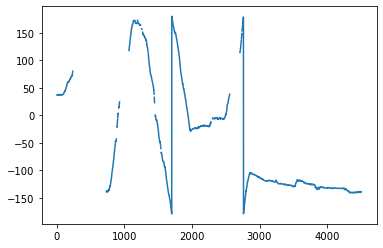

In [26]:
plt.plot(headang)
plt.savefig('full0429_1_0.32_10.pdf')

In [16]:
line_head = np.array([[pts['pupil_left_x'],pts['pupil_left_y']],[pts['pupil_right_x'],pts['pupil_right_y']]])
line_head[:,:,0]

array([[427.58285522, 815.7399292 ],
       [454.60144043, 573.43719482]])

In [17]:
x_points = pts.iloc[:10,0::3]#.iloc[:,[2,5]]
y_points = pts.iloc[:10,1::3]#.iloc[:,[2,5]]

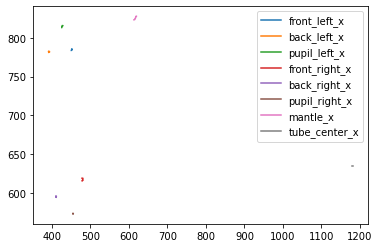

In [18]:
plt.plot(x_points,y_points)
plt.legend(x_points.keys())
plt.savefig('head0429_1_0.32_10.pdf')

In [19]:
line_head2 = np.array([[pts['front_left_x'],pts['front_left_y']],[pts['front_right_x'],pts['front_right_y']]])


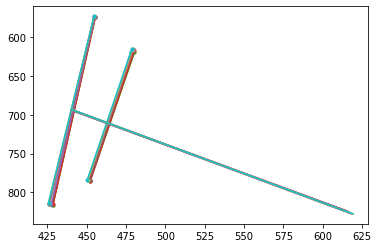

<Figure size 432x288 with 0 Axes>

In [20]:
dt = 10
plt.plot(line_head[:,0,:dt],line_head[:,1,:dt], '.-')
plt.plot(line_head2[:,0,:dt],line_head2[:,1,:dt], '.-')

plt.plot(head_line[:,0,:dt], head_line[:,1,:dt])
plt.gca().invert_yaxis()

plt.show()
plt.savefig('angle0429_1_0.32_10.pdf')

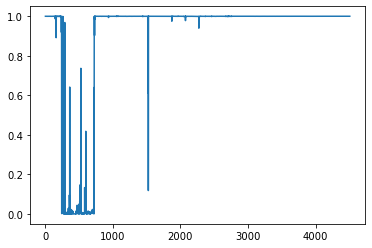

In [21]:
plt.plot(pts['front_left_likelihood'])